# Simple example of plotting an earthquake source mechanism using SeisSrcInv

This jupyter-notebook provides a simple example of how to plot an earthquake source mechanism using SeisSrcInv's built in plotting functions.

In [1]:
# Import the module:
import SeisSrcInv
import matplotlib.pyplot as plt

## 1. Understand the format of input data for an earthquake:

In [5]:
help(SeisSrcInv.plot.plot_radiation_pattern_for_given_NED_full_MT) #(ax, radiation_pattern_full_MT, bounding_circle_path, lower_upper_hemi_switch="lower", radiation_MT_phase="P", unconstrained_vs_DC_switch="unconstrained", plot_plane="EN")



Help on function plot_radiation_pattern_for_given_NED_full_MT in module SeisSrcInv.plot:

plot_radiation_pattern_for_given_NED_full_MT(ax, radiation_pattern_full_MT, bounding_circle_path, lower_upper_hemi_switch='lower', radiation_MT_phase='P', unconstrained_vs_DC_switch='unconstrained', plot_plane='EN')
    Function to plot radiation pattern on axis ax, given 6 MT describing MT to plot radiation pattern for and other args.
    Outputs axis ax with radiation pattern plotted.



In [2]:
# Specify all inversion input variables:


datadir = 'data/real_and_greens_func_data'
outdir = 'data/FW_data_out'
real_data_fnames = ['real_data_ST01_z.txt', 'real_data_ST01_r.txt', 'real_data_ST01_t.txt', 'real_data_ST02_z.txt', 'real_data_ST02_r.txt', 'real_data_ST02_t.txt', 'real_data_ST03_z.txt', 'real_data_ST03_r.txt', 'real_data_ST03_t.txt'] # List of real waveform data files within datadir corresponding to each station (i.e. length is number of stations to invert for)
MT_green_func_fnames = ['green_func_array_MT_ST01_z.txt', 'green_func_array_MT_ST01_r.txt', 'green_func_array_MT_ST01_t.txt', 'green_func_array_MT_ST02_z.txt', 'green_func_array_MT_ST02_r.txt', 'green_func_array_MT_ST02_t.txt', 'green_func_array_MT_ST03_z.txt', 'green_func_array_MT_ST03_r.txt', 'green_func_array_MT_ST03_t.txt'] # List of Green's functions data files (generated using fk code) within datadir corresponding to each station (i.e. length is number of stations to invert for)
single_force_green_func_fnames = ['green_func_array_single_force_ST01_z.txt', 'green_func_array_single_force_ST01_r.txt', 'green_func_array_single_force_ST01_t.txt', 'green_func_array_single_force_ST02_z.txt', 'green_func_array_single_force_ST02_r.txt', 'green_func_array_single_force_ST02_t.txt', 'green_func_array_single_force_ST03_z.txt', 'green_func_array_single_force_ST03_r.txt', 'green_func_array_single_force_ST03_t.txt'] # List of Green's functions data files (generated using fk code) within datadir corresponding to each station (i.e. length is number of stations to invert for)
data_labels = ["ST01, Z", "ST01, R", "ST01, T", "ST02, Z", "ST02, R", "ST02, T", "ST03, Z", "ST03, R", "ST03, T"] # Format of these labels must be of the form "station_name, comp" with the comma
inversion_type = 'DC' # Inversion type automatically filled (if single force, greens functions must be 3 components rather than 6) (Options are: "DC", "single_force", "full_mt", "full_mt_Lune_samp", "DC_single_force_couple", "DC_single_force_no_coupling", "DC_crack_couple", "single_force_crack_no_coupling"]: #["full_mt", "DC", "single_force", "DC_single_force_couple", "DC_single_force_no_coupling", "DC_crack_couple", "single_force_crack_no_coupling")
perform_normallised_waveform_inversion = False 
compare_all_waveforms_simultaneously = False 
num_samples = 1000 # Number of samples to perform Monte Carlo over (typically might want to use 10e6, but used 1000 here for speed)
comparison_metric = "VR"
manual_indices_time_shift_MT = [9, -10, -9, 6, -15, -15, 8, 14, -13]
manual_indices_time_shift_SF = [9, -11, -10, 6, -16, -16, 7, 13, -14]
cut_phase_start_vals = [0, 600, 600, 0, 575, 575, 0, 650, 650]
cut_phase_length = 150
nlloc_hyp_filename = "data/NLLoc_data/loc.Tom__RunNLLoc000.20090121.042009.grid0.loc.hyp"
num_processors = 1 # Number of processors to run for (default is 1)
set_pre_time_shift_values_to_zero_switch = False # If True, sets values before time shift to zero (default is True)
return_absolute_similarity_values_switch = True # If True, will also save absolute similarity values, as well as the normallised values.
# For other options, see help(SeisSrcInv.inversion.run())

In [3]:
# And perform inversion:
SeisSrcInv.inversion.run(datadir, outdir, real_data_fnames, MT_green_func_fnames, single_force_green_func_fnames, data_labels, inversion_type, num_samples, comparison_metric, nlloc_hyp_filename, perform_normallised_waveform_inversion=perform_normallised_waveform_inversion, compare_all_waveforms_simultaneously=compare_all_waveforms_simultaneously, manual_indices_time_shift_MT=manual_indices_time_shift_MT, manual_indices_time_shift_SF=manual_indices_time_shift_SF, num_processors=num_processors, set_pre_time_shift_values_to_zero_switch=set_pre_time_shift_values_to_zero_switch, return_absolute_similarity_values_switch=return_absolute_similarity_values_switch, cut_phase_start_vals=cut_phase_start_vals, cut_phase_length=cut_phase_length)


Saving FW inversion to file: data/FW_data_out/least_squares_result/20090121042009185230_FW_DC.pkl
Saving FW inversion to file: data/FW_data_out/least_squares_result/20090121042009185230_FW_DC.wfs


/Users/tomhudson/anaconda2/lib/python2.7/site-packages/SeisSrcInv-0.0.2-py2.7.egg/SeisSrcInv/inversion.py:245: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Processing for process: 0 for  1000 samples.
Processor number: 0 - Processed for 0 samples out of 1000 samples
Finished processing process: 0 for  1000 samples.
Saving FW inversion to file: data/FW_data_out/20090121042009185230_FW_DC.pkl
Saving FW inversion to file: data/FW_data_out/20090121042009185230_FW_DC.wfs
Finished


## 2. And plot results:

Note: Result may not be realistic since only performed for a small number of samples above.

In [4]:
# Specify plotting parameters:
inversion_type = "DC" # Must be same as above
inversion_output_data_dir = "data/FW_data_out"
event_uid = "20090121042009185230" # UID, as saved for output files
plot_wfs_on_focal_mech_switch= True # If True, plots waveforms on focal mechanism plot (default is True)
# For other options, see help(SeisSrcInv.plot.run())

Plotting data for inversion
Processing data for: data/FW_data_out/20090121042009185230_FW_DC.pkl
Full MT (max prob.):
[[  -4.95871957    6.38709517  268.21682918]
 [   6.38709517   -8.22691908 -345.4775751 ]
 [ 268.21682918 -345.4775751    13.18563866]]
(For plotting radiation pattern)
Finished processing unconstrained inversion data for: data/FW_data_out/20090121042009185230_FW_DC.pkl
Finished


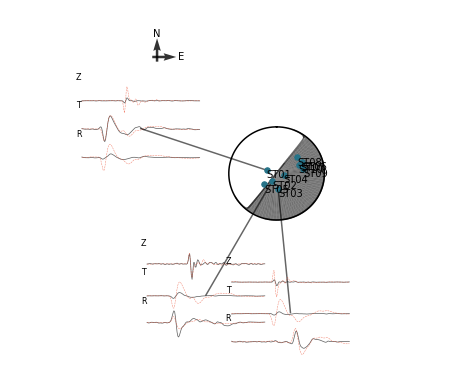

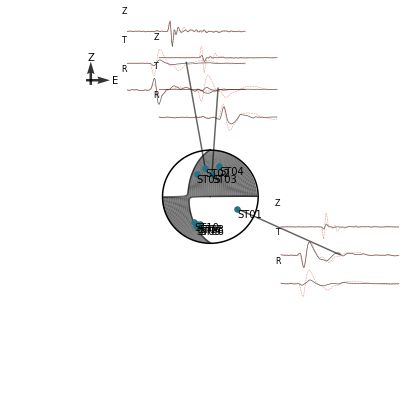

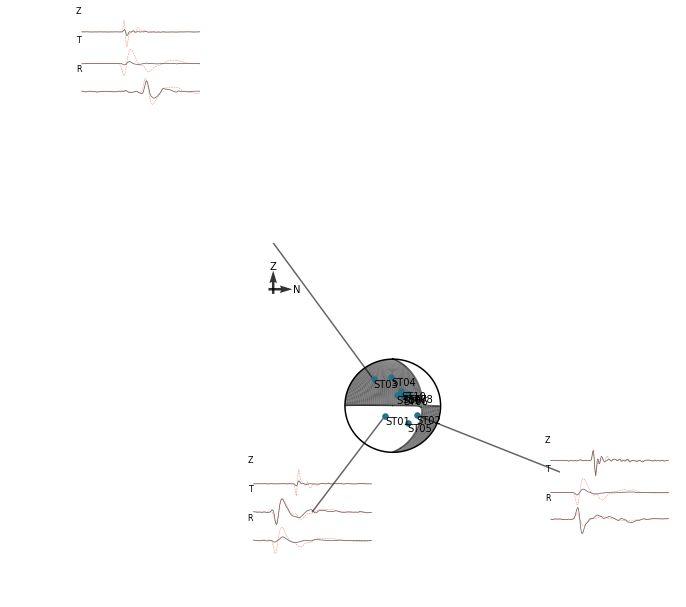

In [5]:
# Run the plotting:
SeisSrcInv.plot.run(inversion_type, event_uid, inversion_output_data_dir,plot_wfs_on_focal_mech_switch=plot_wfs_on_focal_mech_switch)
# (Note: Saves output to files in adirectory "Plots")